<a href="https://colab.research.google.com/github/kgpark88/ai-summary/blob/main/04_DataAnalysis_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 타이타닉 데이터셋 분석

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

###  데이터셋 불러오기

In [ ]:
df = sns.load_dataset('titanic')
print(df.shape)

(891, 15)


### 데이터프레임 내용 확인

In [ ]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


In [ ]:
df.describe(include='all')

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
count,891.000000,891.000000,891,714.000000,891.000000,891.000000,891.000000,889,891,891,891,203,889,891,891
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3,3,3,2,7,3,2,2
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S,Third,man,True,C,Southampton,no,True
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,644,491,537,537,59,644,549,537
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,49.693429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,7.910400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 결측값 확인

In [ ]:
!pip install missingno

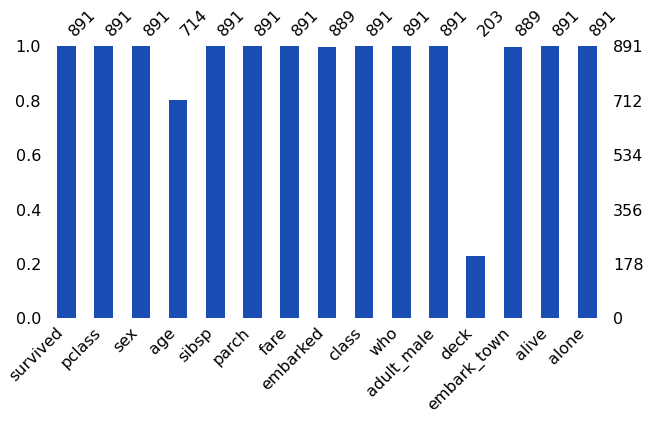

In [ ]:
import missingno as msno

msno.bar(df, figsize=(10, 5), color=(0.1, 0.3, 0.7))
plt.show()

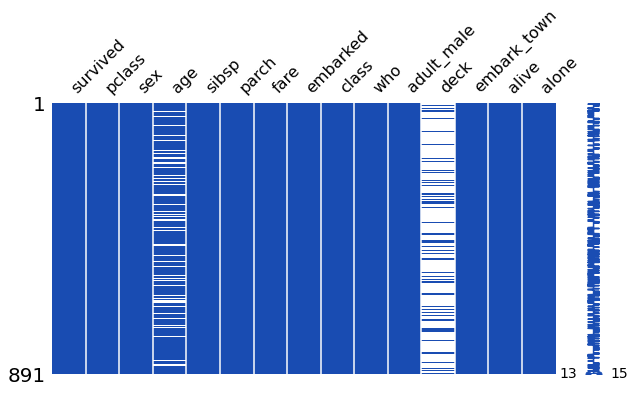

In [ ]:
msno.matrix(df, figsize=(10, 5), color=(0.1, 0.3, 0.7))
plt.show()

### Seaborn 라이브러리를 사용하여 데이터간의 상관관계를 히트맵 그래프로 출력하세요. 그래프에는 상관관계 계수를 표시하세요. 

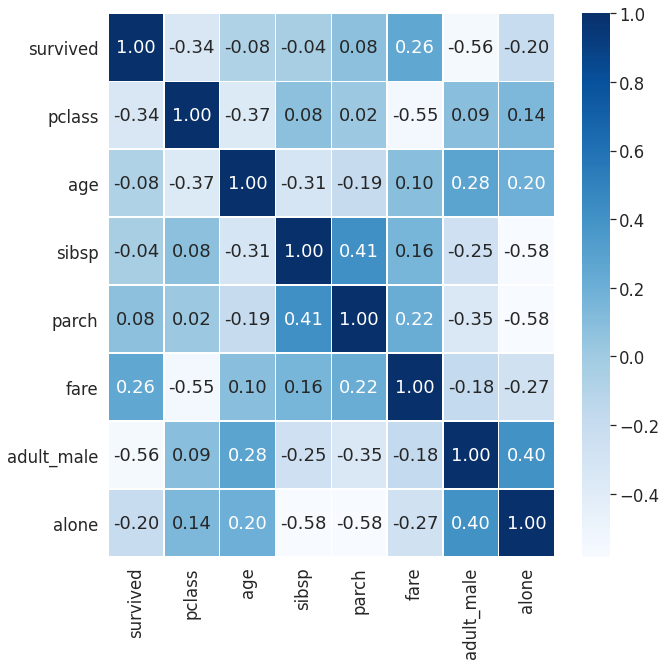

In [ ]:
plt.figure(figsize=(10, 10))
sns.set(font_scale=1.5)
sns.heatmap(data = df.corr(), annot=True, fmt = '.2f', linewidths=.5, cmap='Blues')
plt.show()

### 타겟 레이블의 분포 확인

In [ ]:
df['survived'].value_counts(dropna=False)

0    549
1    342
Name: survived, dtype: int64

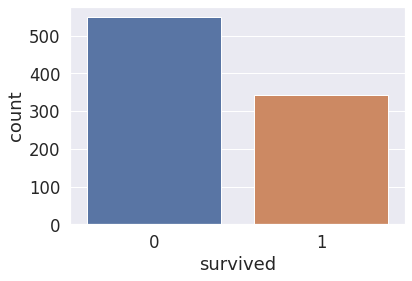

In [ ]:
sns.countplot(x='survived', data=df)
plt.show()

### 객실등급(pclass) 데이터 분포 확인

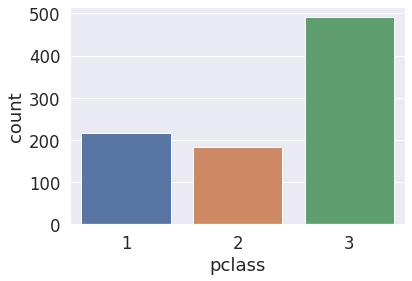

In [ ]:
sns.countplot(x='pclass', data=df)
plt.show()

### pclass별 survived 여부
1등석 승객의 생존율이 높고 3등석 승객의 생존율이 매우 낮다.

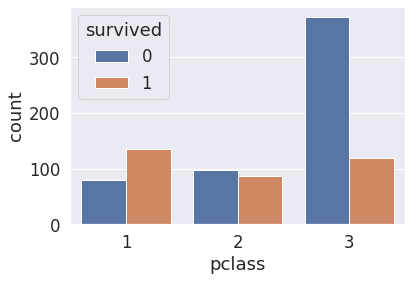

In [ ]:
sns.countplot(x='pclass', hue='survived', data=df)
plt.show()

### pclass별 fare 평균값 비교
생존자가 많은 1등석과 2등석을 보면, 생존자들이 지불한 객실요금이 높은 패턴으로 나타난다.

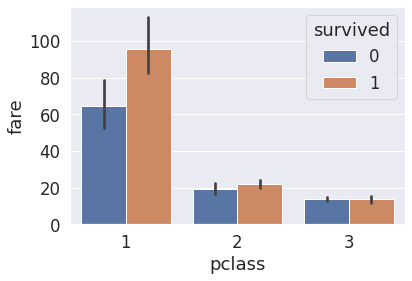

In [ ]:
sns.barplot(x='pclass', y='fare', hue='survived', data=df, estimator=np.mean)
plt.show()

### 성별(sex)에 따른 생존율 분포 

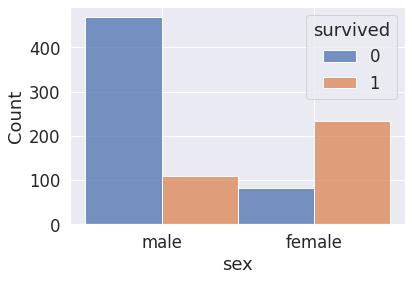

In [ ]:
# histplot - dodge 옵션
sns.histplot(x='sex', hue='survived', multiple='dodge', data=df)
plt.show()

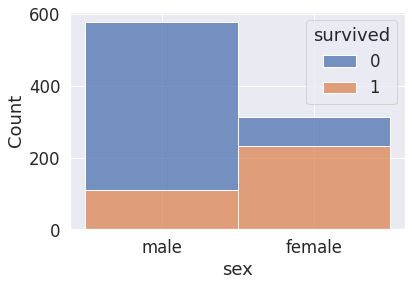

In [ ]:
# histplot - stack 옵션
sns.histplot(x='sex', hue='survived', multiple='stack', data=df)
plt.show()

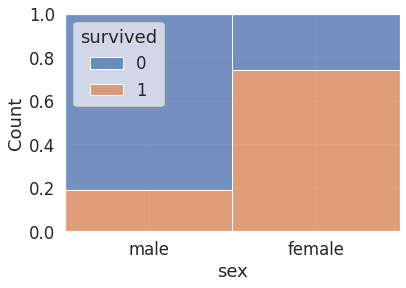

In [ ]:
# histplot - fill 옵션
sns.histplot(x='sex', hue='survived', multiple='fill', data=df)
plt.show()

### 승객 나이와 생존 여부와의 관계

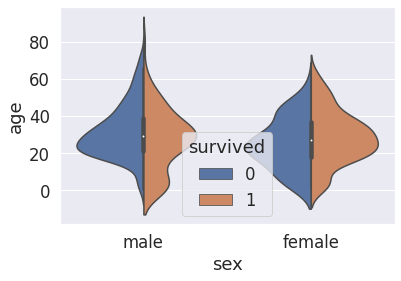

In [ ]:
sns.violinplot(x='sex', y='age', hue='survived', data=df,  split=True)
plt.show()